## Alucar - Analisando as vendas

In [1]:
import pandas as pd

In [2]:
alucar = pd.read_csv("data/time_series/alucar.csv")

In [3]:
alucar.describe()

,vendas
count,24.000000
mean,287.875000
std,222.151204
min,10.000000
25%,96.000000
50%,245.500000
75%,450.750000
max,721.000000


In [4]:
alucar.shape

(24, 2)

In [5]:
alucar.isna().sum().sum()

0

In [6]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

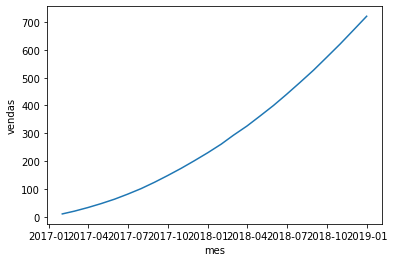

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

In [11]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

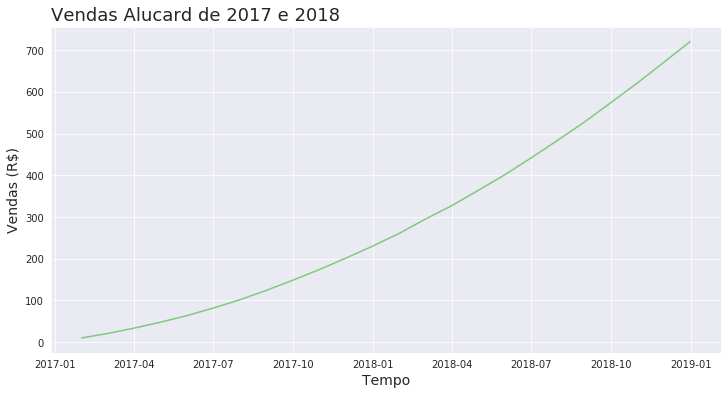

In [12]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas Alucard de 2017 e 2018", loc='left', fontsize=18)
ax.set_xlabel("Tempo", fontsize=14)
ax.set_ylabel("Vendas (R$)", fontsize=14)
ax = ax

In [13]:
alucar['aumento'] = alucar.vendas.diff()

In [14]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


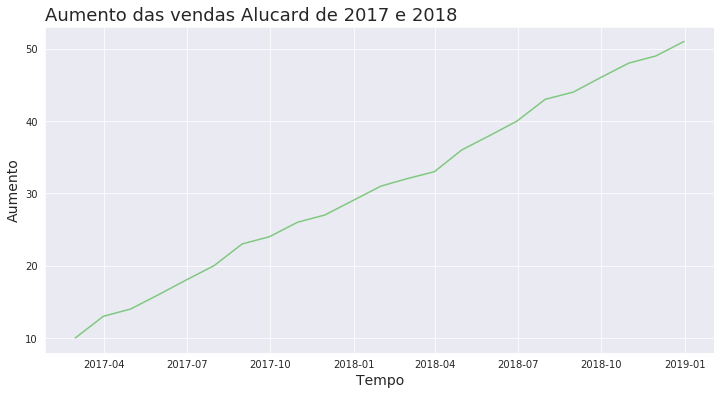

In [15]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento das vendas Alucard de 2017 e 2018", loc='left', fontsize=18)
ax.set_xlabel("Tempo", fontsize=14)
ax.set_ylabel("Aumento", fontsize=14)
ax = ax

In [16]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

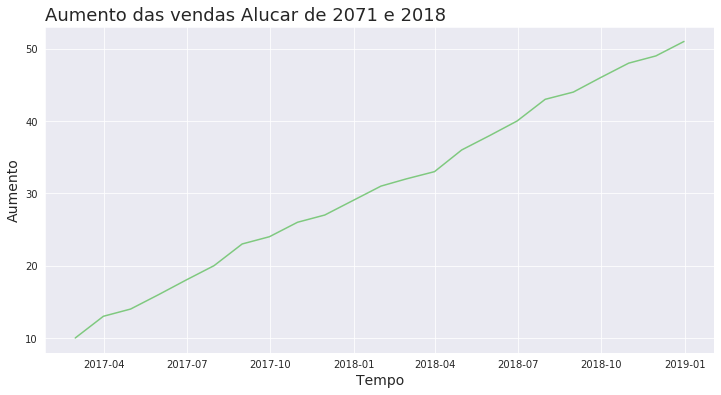

In [17]:
plotar('Aumento das vendas Alucar de 2071 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [18]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


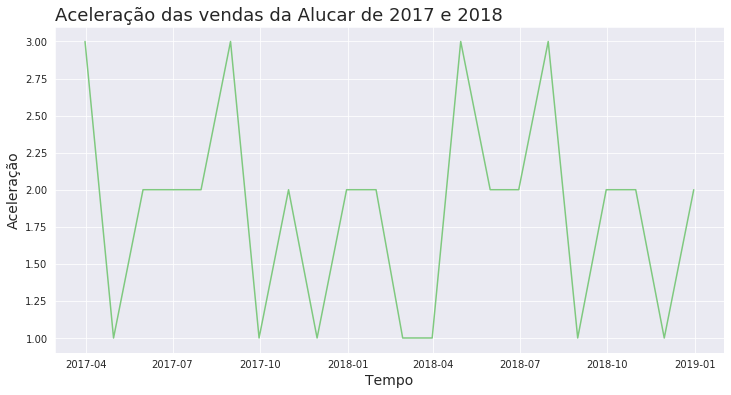

In [19]:
plotar("Aceleração das vendas da Alucar de 2017 e 2018", 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

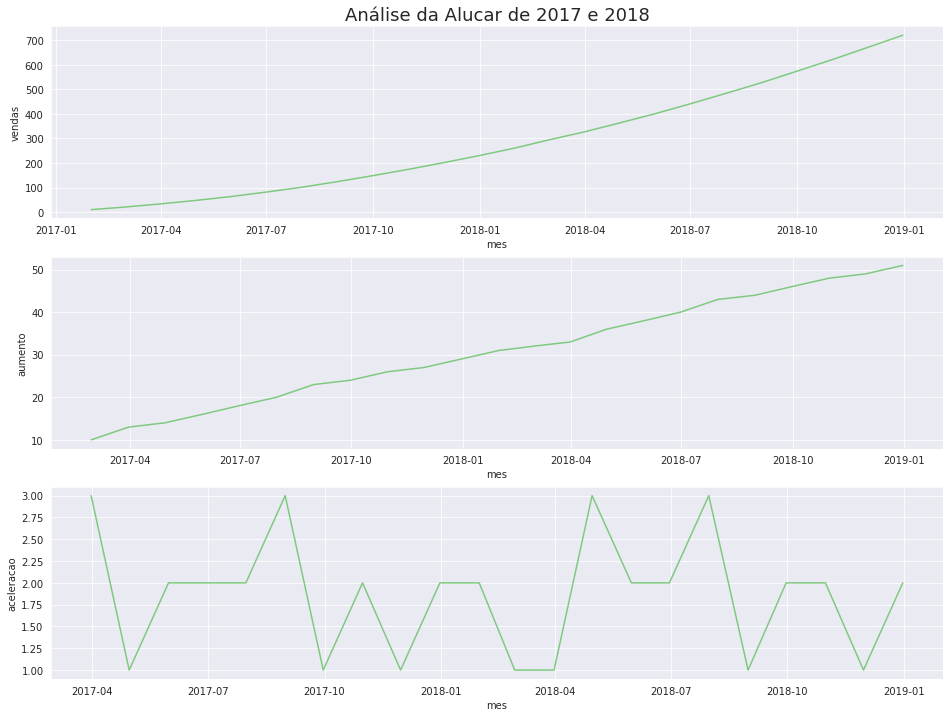

In [20]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title("Análise da Alucar de 2017 e 2018", fontsize=18)
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [21]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18)
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

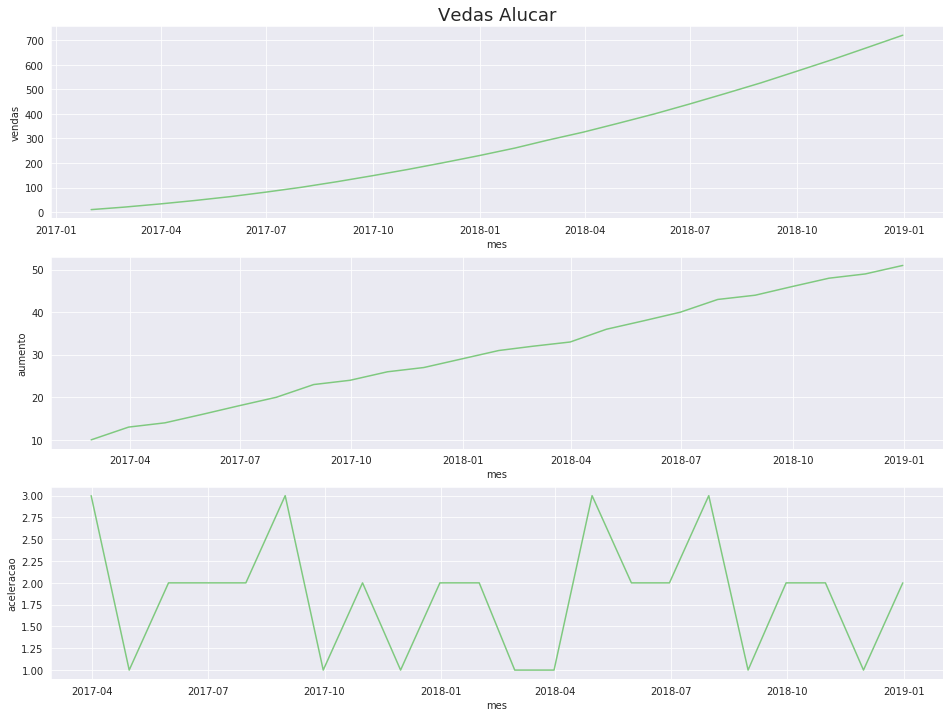

In [22]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, "Vedas Alucar")

In [23]:
from pandas.plotting import autocorrelation_plot

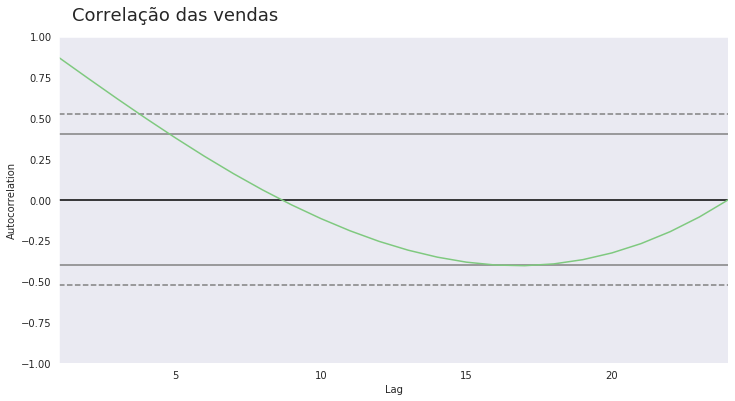

In [24]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação das vendas", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.vendas)
ax=ax

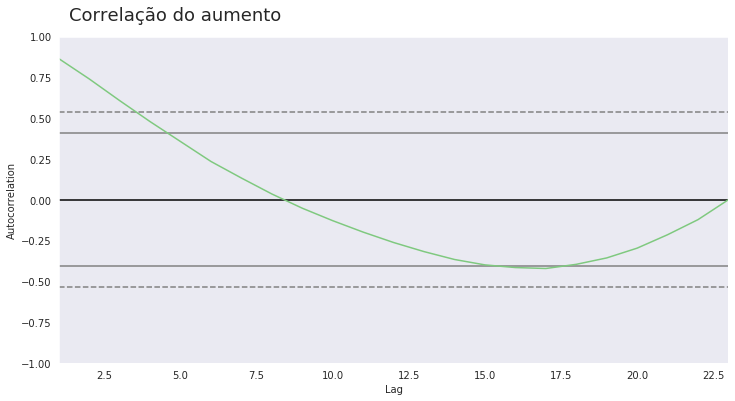

In [25]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação do aumento", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aumento[1:])
ax=ax

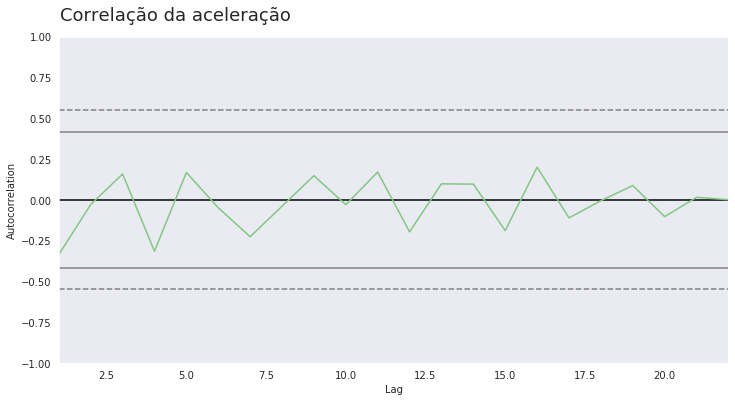

In [26]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação da aceleração", fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar.aceleracao[2:])
ax=ax

## Alucar - Analisando as vendas

In [27]:
assinantes = pd.read_csv("data/time_series/newsletter_alucar.csv")

In [28]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [29]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [30]:
assinantes["aumento"] = assinantes.assinantes.diff()

In [31]:
assinantes["aceleracao"] = assinantes.aumento.diff()

In [32]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


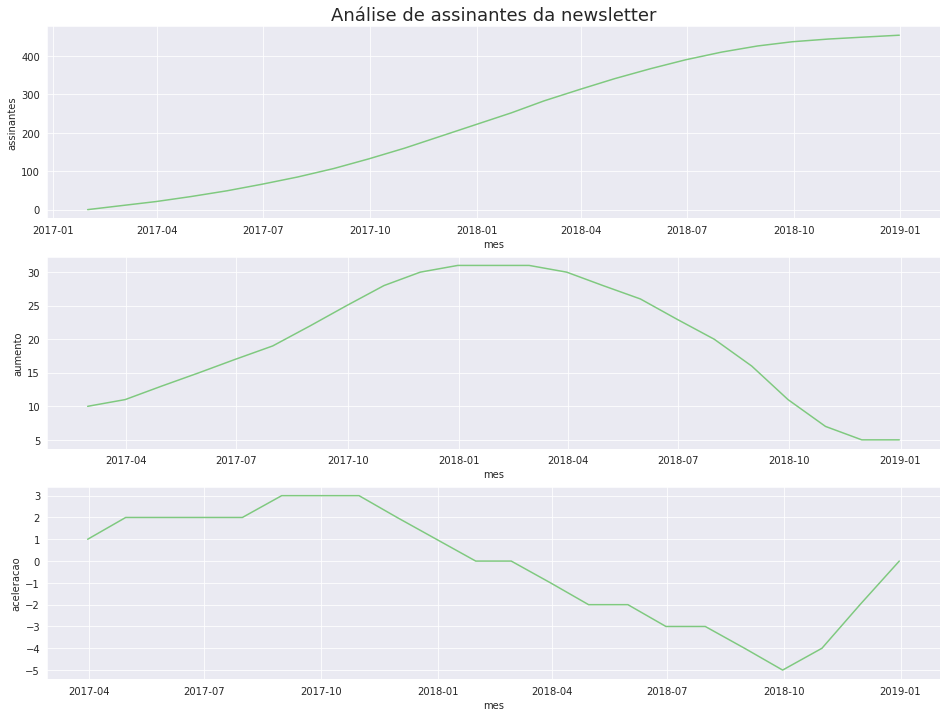

In [33]:
plot_comparacao("mes", "assinantes", "aumento", "aceleracao", assinantes, "Análise de assinantes da newsletter")

## Chocolura - Analisando as vendas

In [34]:
chocolura = pd.read_csv("data/time_series/chocolura.csv")
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [35]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [36]:
chocolura["aumento"] = chocolura["vendas"].diff()
chocolura["aceleracao"] = chocolura["aumento"].diff()

In [37]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


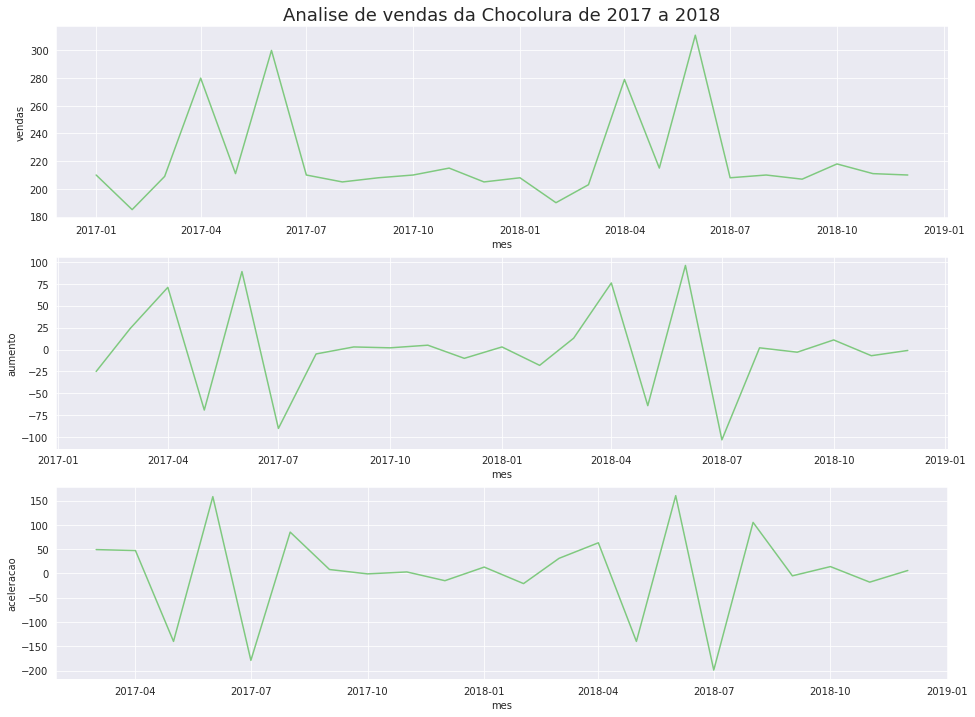

In [38]:
plot_comparacao("mes", "vendas", "aumento", "aceleracao", chocolura, "Analise de vendas da Chocolura de 2017 a 2018")

## chocolura - vendas diarias (outubro e novembro)

In [39]:
vendas_por_dia = pd.read_csv("data/time_series/vendas_por_dia.csv")

In [40]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [41]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [42]:
vendas_por_dia["aumento"] = vendas_por_dia["vendas"].diff()
vendas_por_dia["aceleracao"] = vendas_por_dia["aumento"].diff()

vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


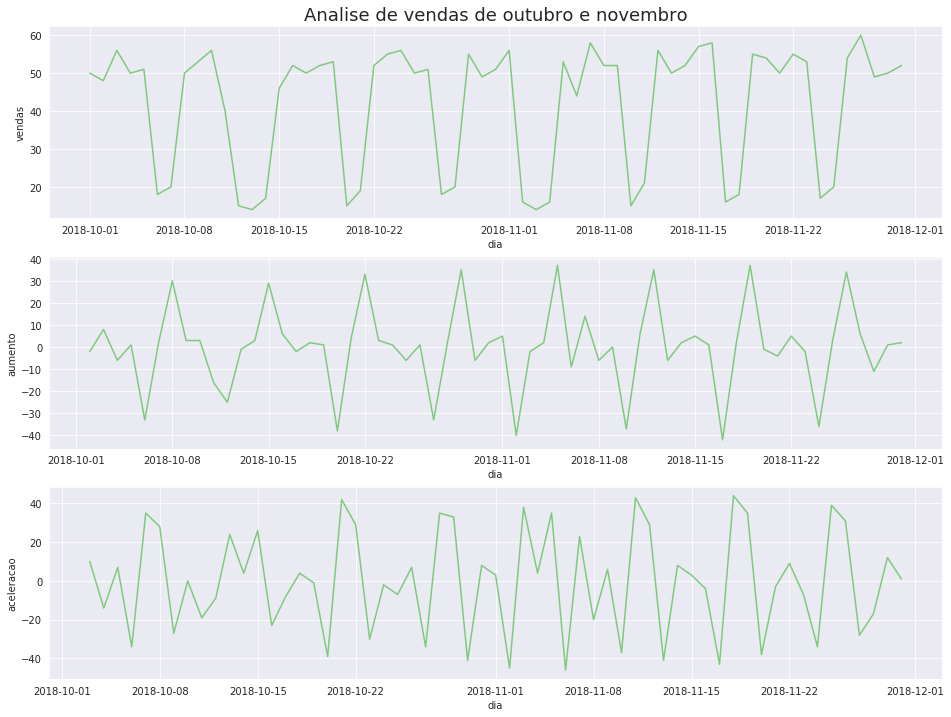

In [43]:
plot_comparacao("dia", "vendas", "aumento", "aceleracao", vendas_por_dia, "Analise de vendas de outubro e novembro")

## analisando a sazonalidade

In [44]:
vendas_por_dia["dia_da_semana"] = vendas_por_dia["dia"].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [45]:
vendas_por_dia["dia_da_semana"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [46]:
dias_traduzidos = {'Monday':"Segunda", 'Tuesday':"Terca", 'Wednesday':"Quarta", 'Thursday':"Quinta", 
                   'Friday':"Sexta", 'Saturday':"Sabado",'Sunday':"Domingo"}

In [47]:
vendas_por_dia["dia_da_semana"] = vendas_por_dia["dia_da_semana"].map(dias_traduzidos)

In [48]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


## Agrupando os dias

In [49]:
vendas_agrupadas = vendas_por_dia.groupby("dia_da_semana")["vendas", "aumento", "aceleracao"].mean().round()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [50]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


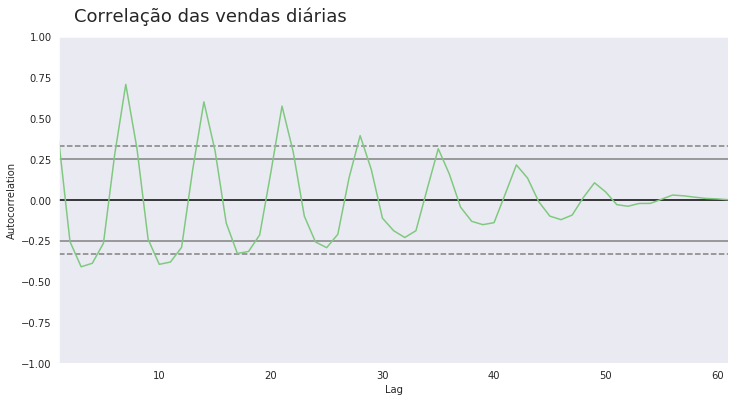

In [53]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação das vendas diárias", fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia["vendas"])
ax=ax

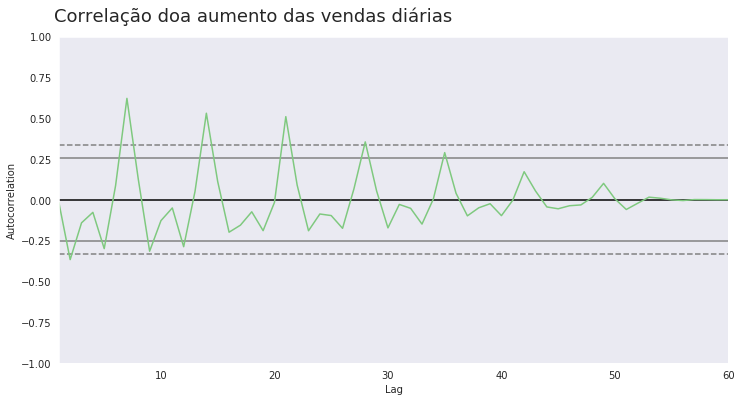

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação doa aumento das vendas diárias", fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia["aumento"][1:])
ax=ax

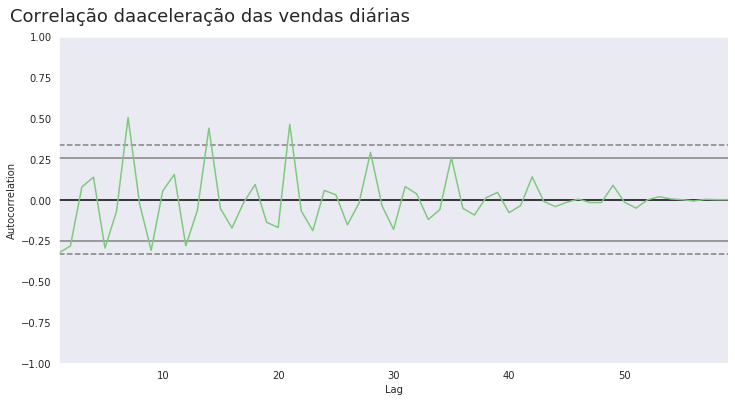

In [57]:
ax = plt.figure(figsize=(12,6))
ax.suptitle("Correlação daaceleração das vendas diárias", fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia["aceleracao"][2:])
ax=ax

## CaféLura - Análise de Vendas

In [58]:
cafelura = pd.read_csv("data/time_series/cafelura.csv")

In [60]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [61]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [62]:
cafelura["mes"] = pd.to_datetime(cafelura["mes"])

cafelura.dtypes

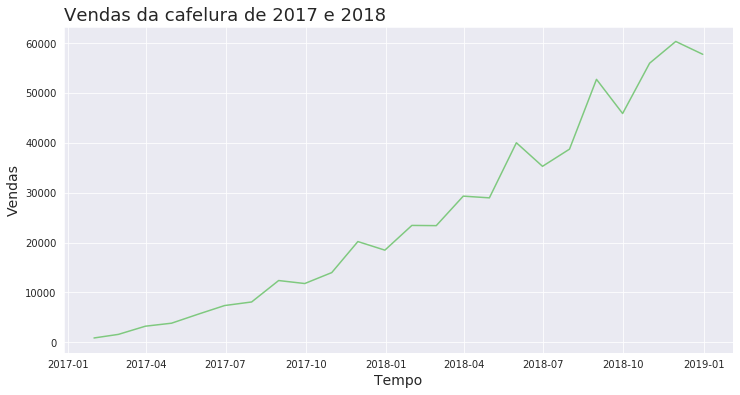

In [64]:
plotar("Vendas da cafelura de 2017 e 2018", "Tempo", "Vendas", "mes", "vendas", cafelura)

In [65]:
quantidades_de_dia_de_semana = pd.read_csv("data/time_series/dias_final_de_semana.csv")

In [69]:
quantidades_de_dia_de_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [72]:
cafelura["vendas_normalizadas"] = cafelura["vendas"]/quantidades_de_dia_de_semana["quantidade_de_dias"].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


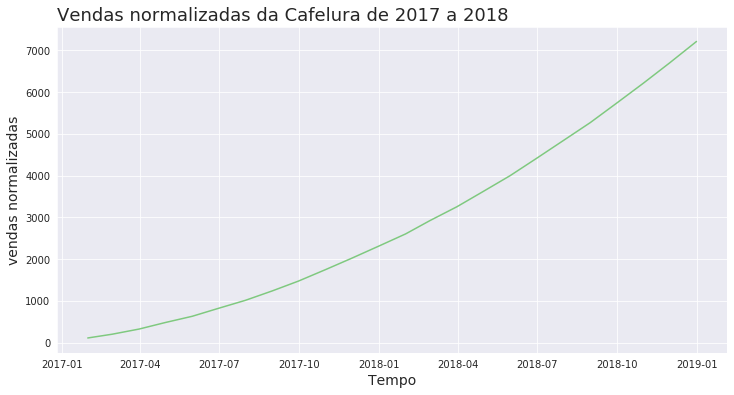

In [73]:
plotar("Vendas normalizadas da Cafelura de 2017 a 2018", "Tempo", "vendas normalizadas", "mes", "vendas_normalizadas", cafelura)

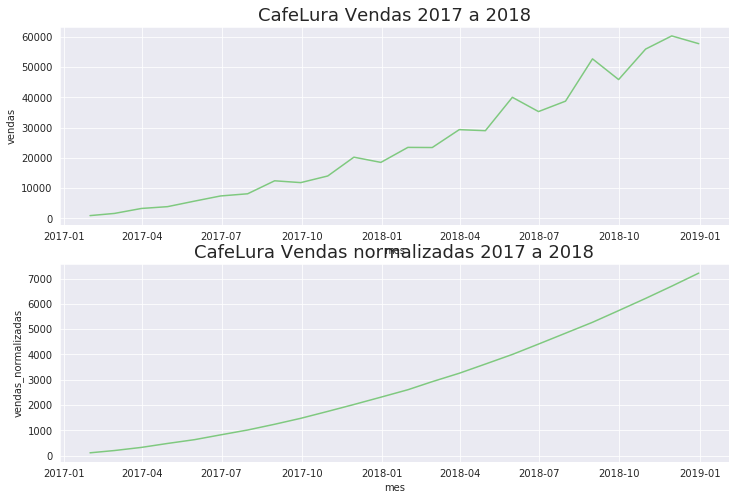

In [74]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title("CafeLura Vendas 2017 a 2018", fontsize=18)
sns.lineplot(x="mes", y="vendas", data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title("CafeLura Vendas normalizadas 2017 a 2018", fontsize=18)
sns.lineplot(x="mes", y="vendas_normalizadas", data=cafelura)
ax=ax

## Statsmodels

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


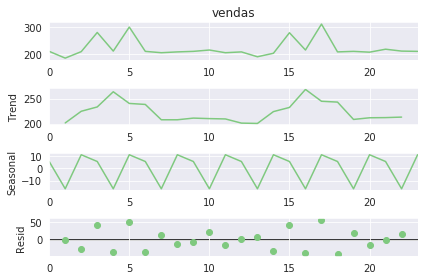

In [106]:
# chocolura.head()
resultado = seasonal_decompose(chocolura["vendas"], freq=3)
ax = resultado.plot()

In [107]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [108]:
data = ({"observacao":observacao, "tendencia":tendencia, "sazonalidade":sazonalidade, "ruido":ruido})

In [109]:
resultado = pd.DataFrame(data)

In [110]:
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


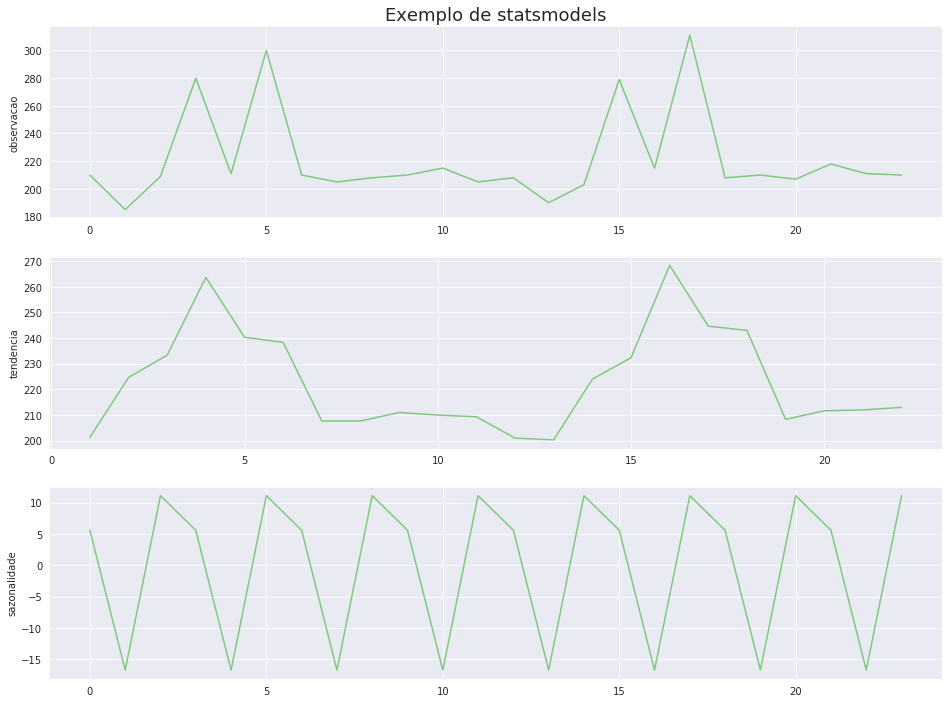

In [111]:
plot_comparacao(resultado.index, "observacao", "tendencia", "sazonalidade", resultado, "Exemplo de statsmodels")

## Alucel - Análise de vendas

In [112]:
alucel = pd.read_csv("data/time_series/alucel.csv")

In [113]:
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [114]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [115]:
alucel.dia = pd.to_datetime(alucel.dia)
alucel.dtypes


dia       datetime64[ns]
vendas           float64
dtype: object

In [116]:
alucel["aumento"] = alucel.vendas.diff()
alucel["aceleracao"] = alucel.aumento.diff()

In [117]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


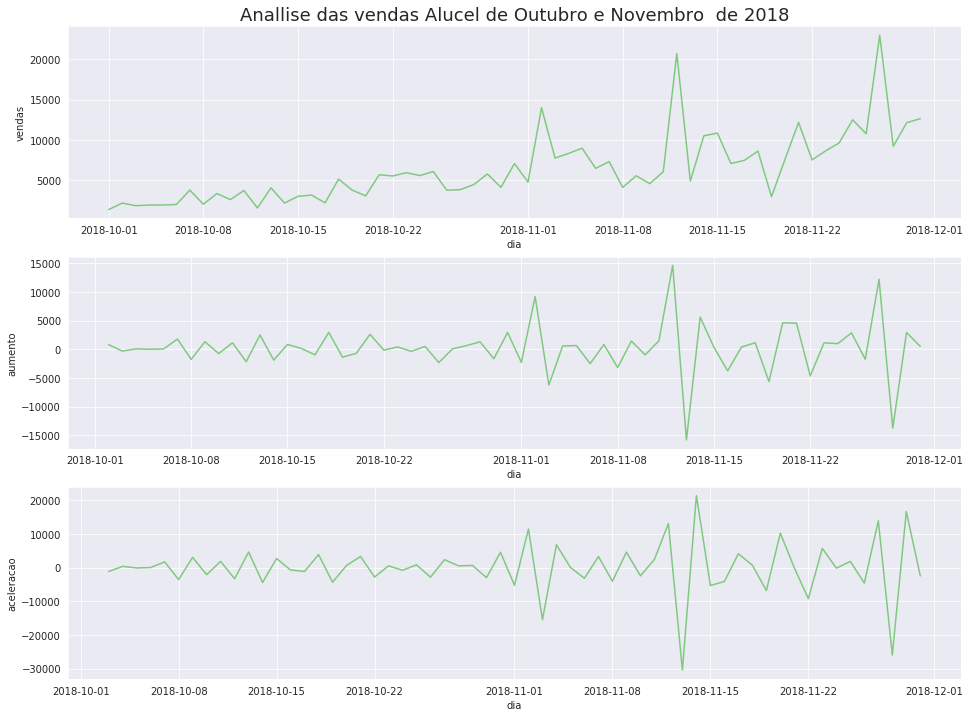

In [119]:
plot_comparacao("dia", "vendas", "aumento", "aceleracao", alucel, "Anallise das vendas Alucel de Outubro e Novembro  de 2018")

## Média móvel

In [122]:
alucel["media_movel"] = alucel.vendas.rolling(7).mean()

In [124]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


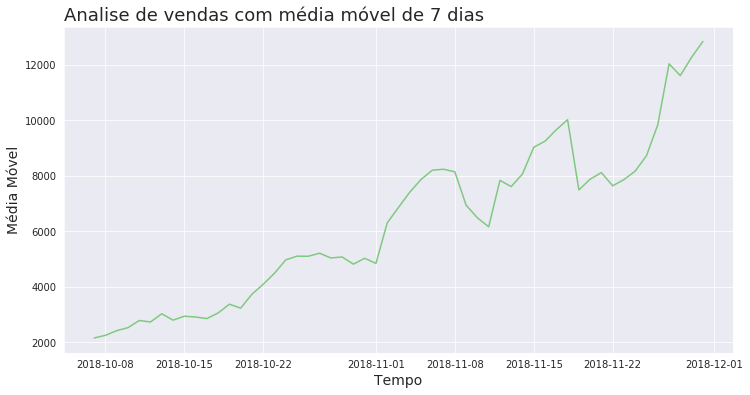

In [125]:
plotar("Analise de vendas com média móvel de 7 dias", "Tempo", "Média Móvel", "dia", "media_movel", alucel)

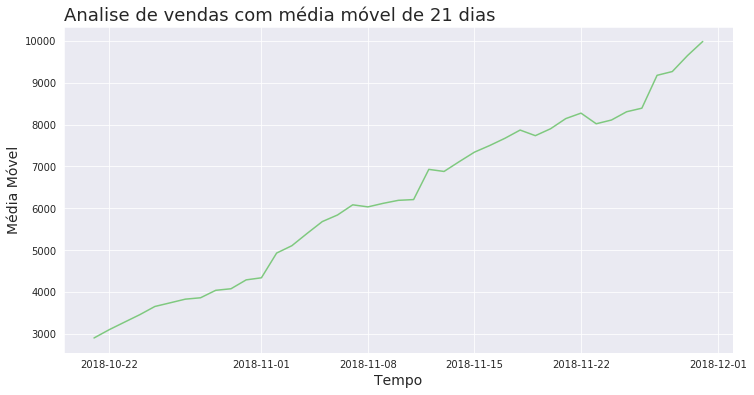

In [126]:
alucel["media_movel_21"] = alucel.vendas.rolling(21).mean()
plotar("Analise de vendas com média móvel de 21 dias", "Tempo", "Média Móvel", "dia", "media_movel_21", alucel)

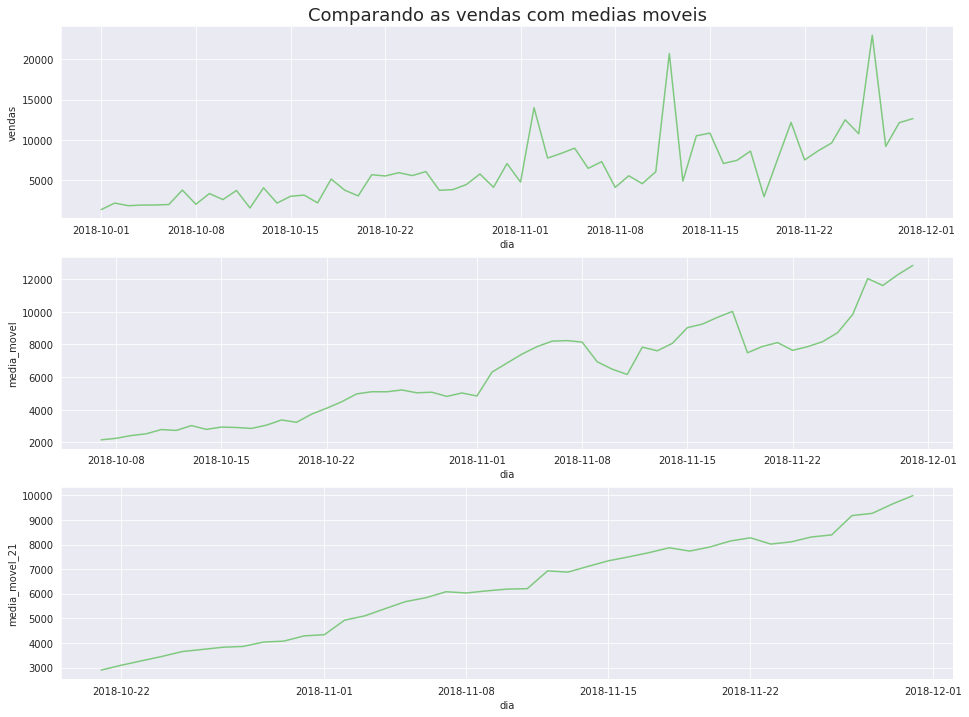

In [127]:
plot_comparacao("dia", "vendas", "media_movel", "media_movel_21", alucel, "Comparando as vendas com medias moveis")